# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports:" data-toc-modified-id="Imports:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports:</a></div><div class="lev1 toc-item"><a href="#Set-some-important-variables-+-working-environment:" data-toc-modified-id="Set-some-important-variables-+-working-environment:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set some important variables + working environment:</a></div><div class="lev1 toc-item"><a href="#Read-raw-data:" data-toc-modified-id="Read-raw-data:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read raw data:</a></div><div class="lev1 toc-item"><a href="#Data-preparation:" data-toc-modified-id="Data-preparation:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preparation:</a></div><div class="lev2 toc-item"><a href="#Convert-watch-accelerometer-to-phone-units-(m/sec^2):" data-toc-modified-id="Convert-watch-accelerometer-to-phone-units-(m/sec^2):-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Convert watch accelerometer to phone units ($m/sec^2$):</a></div><div class="lev2 toc-item"><a href="#Trim-steps'-transition-data:" data-toc-modified-id="Trim-steps'-transition-data:-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Trim steps' transition data:</a></div><div class="lev2 toc-item"><a href="#For-each-sample,-add-(1)-accelerometer-norm-and-(2)-step's-norm-STD:" data-toc-modified-id="For-each-sample,-add-(1)-accelerometer-norm-and-(2)-step's-norm-STD:-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>For each sample, add (1) accelerometer norm and (2) step's norm STD:</a></div><div class="lev1 toc-item"><a href="#Some-initial-data-exploration:" data-toc-modified-id="Some-initial-data-exploration:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Some initial data exploration:</a></div><div class="lev2 toc-item"><a href="#Check-which-users-appear-in-which-datasets:" data-toc-modified-id="Check-which-users-appear-in-which-datasets:-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Check which users appear in which datasets:</a></div><div class="lev2 toc-item"><a href="#Present-reports-from-the-lab,-per-assessment:" data-toc-modified-id="Present-reports-from-the-lab,-per-assessment:-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Present reports from the lab, per assessment:</a></div><div class="lev3 toc-item"><a href="#Inspect-the-per-patient-distribution-of-the-accelerometer-norm,-for-step-&quot;Sit-relaxed&quot;:" data-toc-modified-id="Inspect-the-per-patient-distribution-of-the-accelerometer-norm,-for-step-&quot;Sit-relaxed&quot;:-521"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Inspect the per patient distribution of the accelerometer norm, for step "Sit relaxed":</a></div><div class="lev3 toc-item"><a href="#And-for-the-entire-data-(without-specifying-a-step):" data-toc-modified-id="And-for-the-entire-data-(without-specifying-a-step):-522"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>And for the entire data (without specifying a step):</a></div><div class="lev3 toc-item"><a href="#Inspect-the-per-patient-distribution-of-the-(per-step)-accelerometer-mean,-over-time,-for-step-&quot;Sit-relaxed&quot;:" data-toc-modified-id="Inspect-the-per-patient-distribution-of-the-(per-step)-accelerometer-mean,-over-time,-for-step-&quot;Sit-relaxed&quot;:-523"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Inspect the per patient distribution of the (per-step) accelerometer mean, over time, for step "Sit relaxed":</a></div><div class="lev2 toc-item"><a href="#Explore-activity-level-for-static-steps:" data-toc-modified-id="Explore-activity-level-for-static-steps:-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Explore activity level for static steps:</a></div><div class="lev2 toc-item"><a href="#Show-box-plots-for-per-assessment-activity-level-vs.-reported-chorea:" data-toc-modified-id="Show-box-plots-for-per-assessment-activity-level-vs.-reported-chorea:-54"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Show box-plots for per-assessment activity level vs. reported chorea:</a></div><div class="lev1 toc-item"><a href="#Raw-accelerometer-data-analysis:" data-toc-modified-id="Raw-accelerometer-data-analysis:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Raw accelerometer data analysis:</a></div><div class="lev2 toc-item"><a href="#Clinic-Raw-Data-Exploration:" data-toc-modified-id="Clinic-Raw-Data-Exploration:-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Clinic Raw Data Exploration:</a></div><div class="lev2 toc-item"><a href="#Home-Raw-Data-Exploration:" data-toc-modified-id="Home-Raw-Data-Exploration:-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Home Raw Data Exploration:</a></div><div class="lev2 toc-item"><a href="#Drill-downs:" data-toc-modified-id="Drill-downs:-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Drill-downs:</a></div>

# Imports:

In [1]:
import os
os.chdir('C:\\Users\\imazeh\\Itzik\\Health_prof\\git_team\\DataScientists')
from Utils.Visualization import box_plot
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.stats import pearsonr, ttest_ind
from os.path import join, sep
import Teva.config as c
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Set some important variables + working environment:

In [2]:
valid_users = c.valid_users
watch_acc_base = c.watch_acc_baseline
phone_acc_base = c.phone_acc_baseline
statistics = ['median', 'mean', np.std]
min_val = c.report_values[0]
max_val = c.report_values[-1]

static_steps_clinic = ['Sit extended', 'Sit relaxed', 'Stand']
static_steps_home = ['Sit relaxed', 'Stand']

In [3]:
trim_dict = {'TUaG': {'start':2, 'end':2},
             'Sit relaxed': {'start':2, 'end':0},
             'Sit extended': {'start':2, 'end':0},
             'Stand': {'start':2, 'end':0},
             'Walk': {'start':2, 'end':2},
             'Drink': {'start':2, 'end':2},
             'Rotate hands': {'start':2, 'end':0}
            }

In [4]:
cloud = False
if cloud:
    data_path = c.cloud_data_path
else:
    data_path = c.data_path

# Read raw data:

In [5]:
# clinic_assessments_watch_acc_df = pd.read_pickle(c.clinic_assessments_watch_acc_pkl_file_path)
# clinic_assessments_watch_acc_df.name = 'clinic_assessments_watch_acc'

clinic_steps_watch_acc_df = pd.read_pickle(c.clinic_steps_watch_acc_pkl_file_path)
clinic_steps_watch_acc_df.name = 'clinic_steps_watch_acc'

# home_assessments_watch_acc_df = pd.read_pickle(c.home_assessments_watch_acc_pkl_file_path)
# home_assessments_watch_acc_df.name = 'home_assessments_watch_acc'

home_steps_watch_acc_df = pd.read_pickle(c.home_steps_watch_acc_pkl_file_path)
home_steps_watch_acc_df.name = 'home_steps_watch_acc'

# home_reminders_watch_acc_df = pd.read_pickle(c.home_reminders_watch_acc_pkl_file_path)
# home_reminders_watch_acc_df.name = 'home_reminders_watch_acc'

clinic_steps_phone_acc_df = pd.read_pickle(c.clinic_steps_phone_acc_pkl_file_path)
clinic_steps_phone_acc_df.name = 'clinic_steps_phone_acc'

home_steps_phone_acc_df = pd.read_pickle(c.home_steps_phone_acc_pkl_file_path)
home_steps_phone_acc_df.name = 'home_steps_phone_acc'

# Data preparation:

## Convert watch accelerometer to phone units ($m/sec^2$):

In [6]:
def convert_mili_g_to_msc2(df, cols_to_convert=['x', 'y', 'z']):
    conversion_factor = c.phone_acc_baseline/float(1000)
    for col in cols_to_convert:
        df[col] = df[col]*conversion_factor
    return df

In [7]:
clinic_steps_watch_acc_df = convert_mili_g_to_msc2(clinic_steps_watch_acc_df)
home_steps_watch_acc_df = convert_mili_g_to_msc2(home_steps_watch_acc_df)
# home_reminders_watch_acc_df = convert_mili_g_to_msc2(home_reminders_watch_acc_df)

## Trim steps' transition data:

In [8]:
def trim_assessment_per_step(assess_df, trim_dict, samples_freq=50):
    sorted_assess_df = assess_df.sort_values(by='timestamp', ascending=True)
    steps_list = assess_df['step_name'].unique()
    trimmed_df = pd.DataFrame()
    for step in steps_list:
        step_df = sorted_assess_df[sorted_assess_df['step_name']==step]
        trim_start_sec = trim_dict[step]['start']
        trim_start_samp = trim_start_sec*samples_freq
        trim_end_sec = trim_dict[step]['end']
        if trim_end_sec != 0:
            trim_end_samp = -(trim_end_sec*samples_freq)
        else:
            trim_end_samp = step_df.shape[0]
        trimmed_step = step_df.iloc[trim_start_samp:trim_end_samp]
        trimmed_df = pd.concat([trimmed_df, trimmed_step])
    return trimmed_df

In [9]:
def trim_entire_df_per_step(df, trim_dict, samsamples_freq=50):
    sorted_df = df.sort_values(by='timestamp', ascending=True)
    assessments_list = df['assessment_id'].unique()
    trimmed_entire_df = pd.DataFrame()
    for assess in assessments_list:
        assess_df = sorted_df[sorted_df['assessment_id']==assess]
        trimmed_assess = trim_assessment_per_step(assess_df, trim_dict)
        trimmed_entire_df = pd.concat([trimmed_entire_df, trimmed_assess])
    return trimmed_entire_df

In [10]:
trimmed_clinic_steps_watch_acc = trim_entire_df_per_step(clinic_steps_watch_acc_df, trim_dict)
trimmed_clinic_steps_watch_acc.name = 'trimmed_clinic_steps_watch_acc'

trimmed_clinic_steps_phone_acc = trim_entire_df_per_step(clinic_steps_phone_acc_df, trim_dict)
trimmed_clinic_steps_phone_acc.name = 'trimmed_clinic_steps_phone_acc'

trimmed_home_steps_watch_acc = trim_entire_df_per_step(home_steps_watch_acc_df, trim_dict)
trimmed_home_steps_watch_acc.name = 'trimmed_home_steps_watch_acc'

trimmed_home_steps_phone_acc = trim_entire_df_per_step(home_steps_phone_acc_df, trim_dict)
trimmed_home_steps_phone_acc.name = 'trimmed_home_steps_phone_acc'

## For each sample, add (1) accelerometer norm and (2) step's norm STD:

In [11]:
def enrich_accelerometer_raw_data(df, global_device_baseline):
    # Add the accelerometer's norm:
    df['acc_norm'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    # Calculate the accelerometer norm's standard deviation for each step:
    step_norm_std = df[['assessment_id', 'step_name', 'acc_norm']].groupby(['assessment_id', 'step_name'],
                                                                           as_index=False).agg(np.std, ddof=0)
    df_with_norm_std = df.merge(right=step_norm_std,
                                how='inner',
                                on=['assessment_id', 'step_name'],
                                suffixes=['', '_step_std'])
    return df_with_norm_std

In [12]:
clinic_watch_acc_with_deltas = enrich_accelerometer_raw_data(trimmed_clinic_steps_watch_acc, watch_acc_base)
clinic_phone_acc_with_deltas = enrich_accelerometer_raw_data(trimmed_clinic_steps_phone_acc, phone_acc_base)
home_watch_acc_with_deltas = enrich_accelerometer_raw_data(trimmed_home_steps_watch_acc, watch_acc_base)
home_phone_acc_with_deltas = enrich_accelerometer_raw_data(trimmed_home_steps_phone_acc, phone_acc_base)

# Some initial data exploration:

## Check which users appear in which datasets:

In [8]:
print(sorted(clinic_assessments_watch_acc_df.user_id.unique().astype(int).tolist()))
print(sorted(clinic_steps_watch_acc_df.user_id.unique().astype(int).tolist()))
print(sorted(home_assessments_watch_acc_df.user_id.unique().astype(int).tolist()))
print(sorted(home_steps_watch_acc_df.user_id.unique().astype(int).tolist()))
print(sorted(home_reminders_watch_acc_df.user_id.unique().astype(int).tolist()))
print(sorted(clinic_steps_phone_acc_df.user_id.unique().astype(int).tolist()))
print(sorted(home_steps_phone_acc_df.user_id.unique().astype(int).tolist()))

[8, 25, 45, 51, 57, 63, 74, 82, 94, 108]
[8, 25, 45, 51, 57, 63, 74, 82, 94, 108]
[8, 25, 45, 51, 57, 63, 74, 82, 94, 108]
[8, 25, 45, 51, 57, 63, 74, 82, 94, 108]
[8, 45, 51, 57, 63, 74, 82, 94, 108]
[8, 25, 45, 51, 57, 63, 74, 82, 94, 108]
[8, 25, 45, 51, 57, 63, 74, 82, 94, 108]


## Present reports from the lab, per assessment:

In [7]:
clinic_assessments_watch_acc_df[['user_id', 'assessment_id', 'patient_report_value', 'clinician_report_value']].\
groupby(['user_id', 'assessment_id'], as_index=False).agg('mean').head(15)

,user_id,assessment_id,patient_report_value,clinician_report_value
0,8,1490640580656,1.0,2.0
1,25,1487605701264,1.0,2.0
2,25,1493912424448,0.0,2.0
3,45,1490637319938,2.0,3.0
4,51,1490284781631,3.0,2.0
5,57,1481923232988,1.0,2.0
6,63,1493920652116,0.0,2.0
7,74,1485546321147,2.0,2.0
8,82,1489765988342,3.0,4.0
9,94,1493741957038,3.0,2.0


### Inspect the per patient distribution of the accelerometer norm, for step "Sit relaxed":

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025502BC7A20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025506FADF28>]], dtype=object)

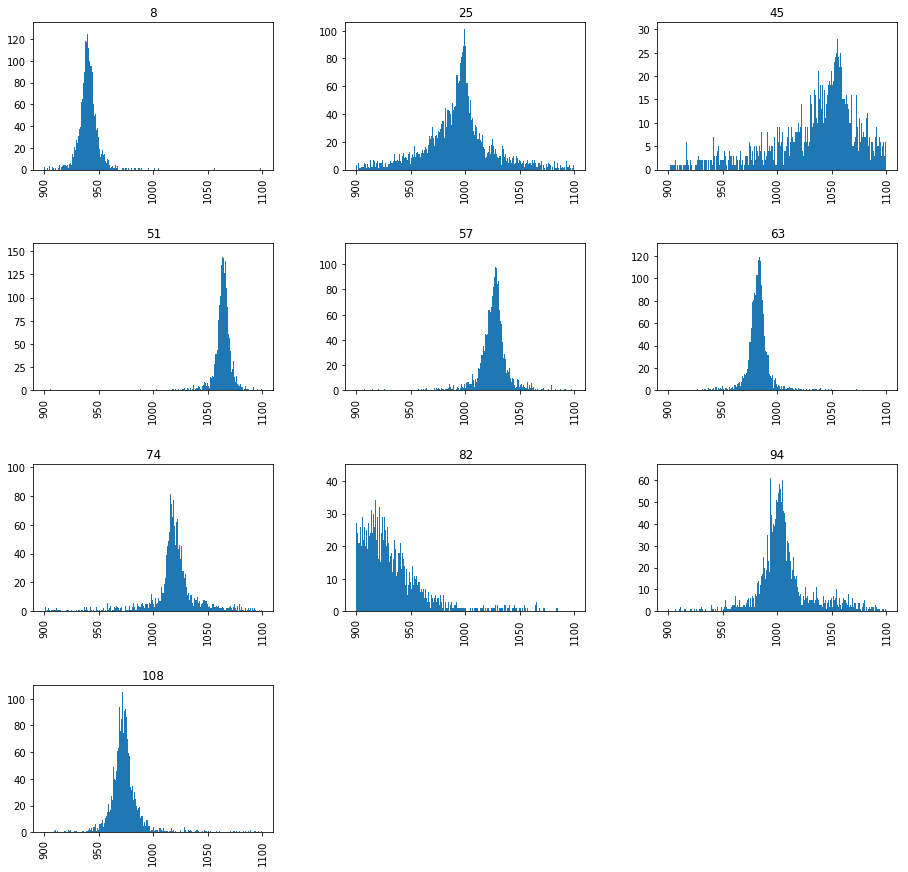

In [213]:
clinic_steps_watch_sit = clinic_steps_watch_acc_df[['user_id', 'acc_norm']]\
                           [clinic_steps_watch_acc_df.step_name=='Sit relaxed']
clinic_steps_watch_sit['acc_norm'].hist(by=clinic_steps_watch_sit['user_id'], figsize=(15,15),
                                           bins=700, range=(900, 1100))

### And for the entire data (without specifying a step):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253A39723C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000253A745AE10>]], dtype=object)

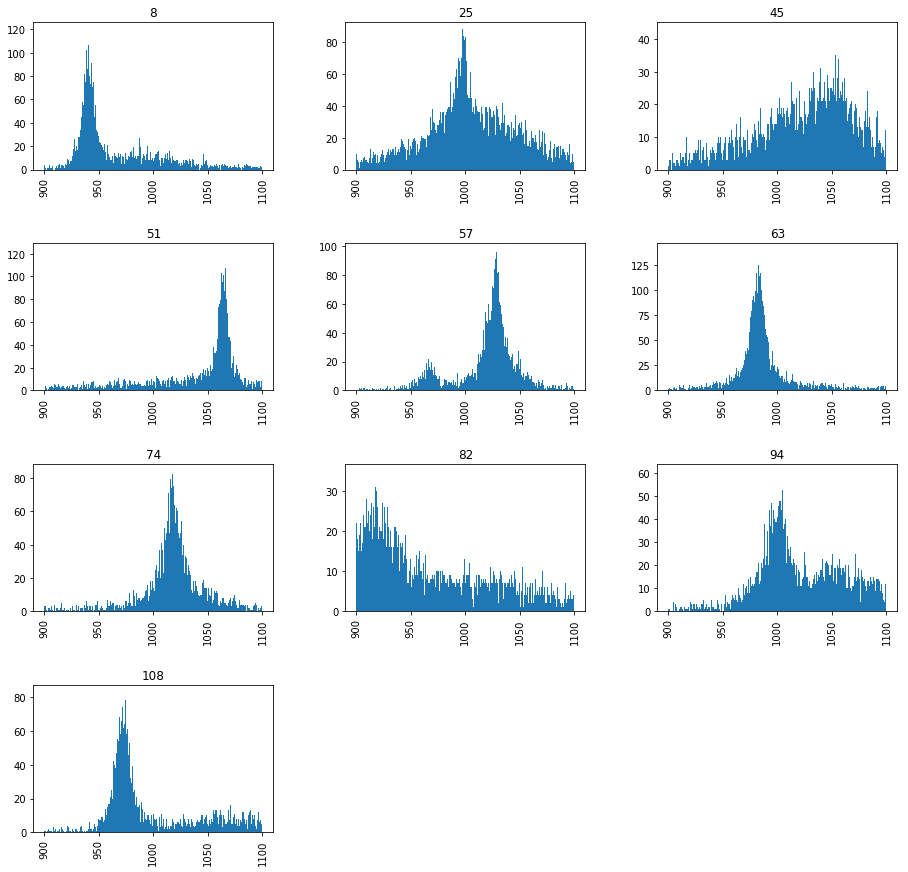

In [132]:
clinic_steps_watch_acc_df['acc_norm'].hist(by=clinic_steps_watch_acc_df['user_id'], figsize=(15,15),
                                           bins=1000, range=(900, 1100))

### Inspect the per patient distribution of the (per-step) accelerometer mean, over time, for step "Sit relaxed":

In [187]:
home_steps_watch_acc_df.sort_values(by='timestamp', ascending=True, inplace=True)
home_steps_watch_mean_norm = home_steps_watch_acc_df[['user_id', 'timestamp', 'assessment_id', 'step_name', 'acc_norm']]\
                             [home_steps_watch_acc_df.step_name=='Sit relaxed']\
                             .groupby(['user_id', 'assessment_id', 'step_name'], as_index=False).agg('mean')

KeyError: "['acc_norm'] not in index"

Patient: 8


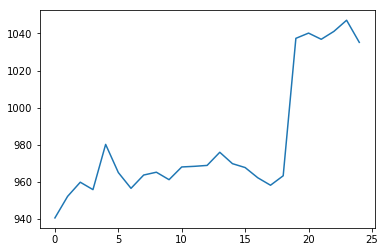

Patient: 25


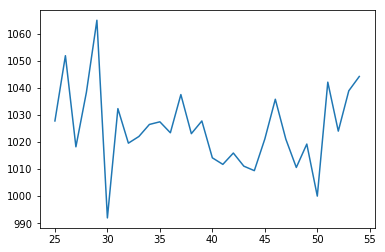

Patient: 45


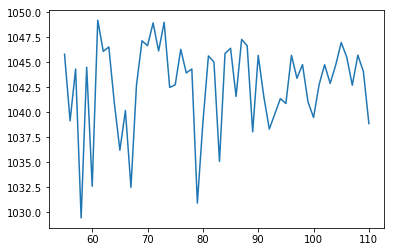

Patient: 51


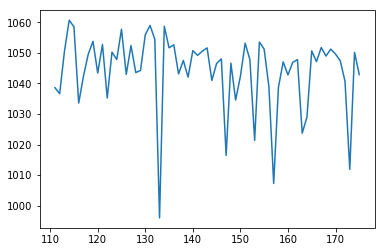

Patient: 57


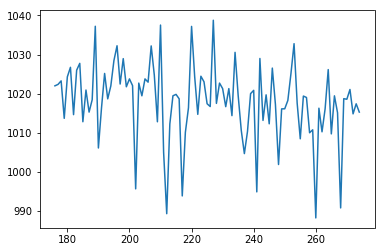

Patient: 63


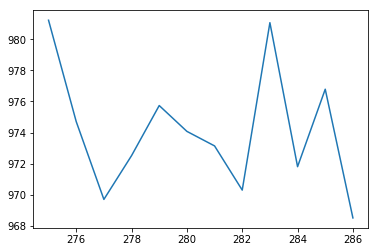

Patient: 74


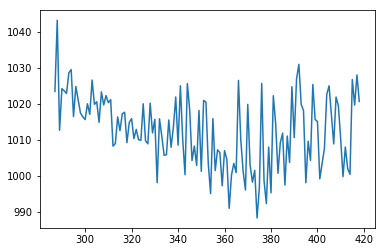

Patient: 82


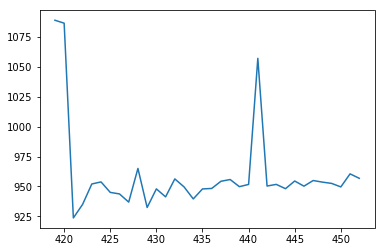

Patient: 94


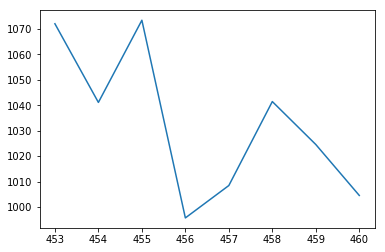

Patient: 108


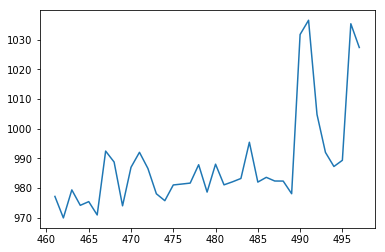

In [154]:
for u in home_steps_watch_mean_norm.user_id.unique():
    print('Patient: %s' % (u))
    plt.plot(home_steps_watch_mean_norm['acc_norm'][home_steps_watch_mean_norm.user_id==u])
    plt.show()
    plt.close()

## Explore activity level for static steps:

In [109]:
clinic_watch_acc_with_deltas.step_name.unique()

array(['TUaG', 'Sit relaxed', 'Sit extended', 'Stand', 'Walk', 'Drink',
       'Rotate hands'], dtype=object)

In [13]:
clinic_watch_acc_step_means = clinic_watch_acc_with_deltas[['user_id', 'assessment_id', 'step_name', 'patient_report_value',
                                                              'clinician_report_value', 'acc_norm_step_std']]\
                                [clinic_watch_acc_with_deltas['step_name'].isin(static_steps_clinic)]\
                                .groupby(['user_id', 'assessment_id', 'step_name'], as_index=False).agg('mean')
clinic_watch_acc_assess_means = clinic_watch_acc_step_means[['user_id', 'assessment_id', 'patient_report_value',
                                                             'clinician_report_value', 'acc_norm_step_std']]\
                                .groupby(['user_id', 'assessment_id'], as_index=False).agg('mean')

    
clinic_phone_acc_step_means = clinic_phone_acc_with_deltas[['user_id', 'assessment_id', 'step_name','patient_report_value',
                                                              'clinician_report_value', 'acc_norm_step_std']]\
                                [clinic_phone_acc_with_deltas['step_name'].isin(static_steps_clinic)]\
                                .groupby(['user_id', 'assessment_id', 'step_name'], as_index=False).agg('mean')
clinic_phone_acc_assess_means = clinic_phone_acc_step_means[['user_id', 'assessment_id', 'patient_report_value',
                                                             'clinician_report_value', 'acc_norm_step_std']]\
                                .groupby(['user_id', 'assessment_id'], as_index=False).agg('mean')

    
home_watch_acc_step_means = home_watch_acc_with_deltas[['user_id', 'assessment_id', 'step_name','patient_report_value',
                                                              'acc_norm_step_std']]\
                                [home_watch_acc_with_deltas['step_name'].isin(static_steps_home)]\
                                .groupby(['user_id', 'assessment_id', 'step_name'], as_index=False).agg('mean')
home_watch_acc_assess_means = home_watch_acc_step_means[['user_id', 'assessment_id', 'patient_report_value',
                                                         'acc_norm_step_std']]\
                                .groupby(['user_id', 'assessment_id'], as_index=False).agg('mean')

    
home_phone_acc_step_means = home_phone_acc_with_deltas[['user_id', 'assessment_id', 'step_name','patient_report_value',
                                                              'acc_norm_step_std']]\
                                [home_phone_acc_with_deltas['step_name'].isin(static_steps_home)]\
                                .groupby(['user_id', 'assessment_id', 'step_name'], as_index=False).agg('mean')
home_phone_acc_assess_means = home_phone_acc_step_means[['user_id', 'assessment_id', 'patient_report_value',
                                                         'acc_norm_step_std']]\
                                .groupby(['user_id', 'assessment_id'], as_index=False).agg('mean')

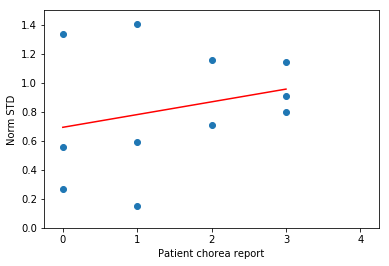

In [15]:
patients = clinic_watch_acc_assess_means.patient_report_value
norm_std = clinic_watch_acc_assess_means.acc_norm_step_std
plt.scatter(patients, norm_std)
plt.plot(np.unique(patients),
         np.poly1d(np.polyfit(patients, norm_std, 1))(np.unique(patients)),
         color='r')
plt.xlim((-0.25,4.25))
plt.ylim((0, 1.5))
plt.xticks(c.report_values, [0,1,2,3,4])
plt.xlabel('Patient chorea report')
plt.ylabel('Norm STD')

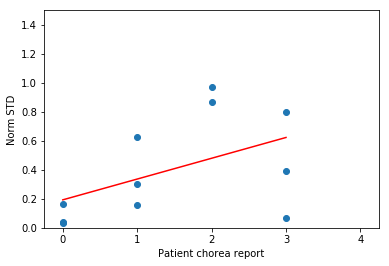

In [16]:
patients = clinic_phone_acc_assess_means.patient_report_value
norm_std = clinic_phone_acc_assess_means.acc_norm_step_std
plt.scatter(patients,
            norm_std)
plt.plot(np.unique(patients),
         np.poly1d(np.polyfit(patients, norm_std, 1))(np.unique(patients)),
         color='r')
plt.xlim((-0.25,4.25))
plt.ylim((0, 1.5))
plt.xticks(c.report_values, [0,1,2,3,4])
plt.xlabel('Patient chorea report')
plt.ylabel('Norm STD')

## Show box-plots for per-assessment activity level vs. reported chorea:

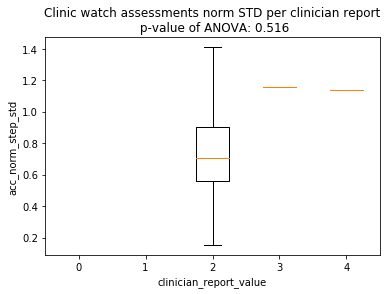

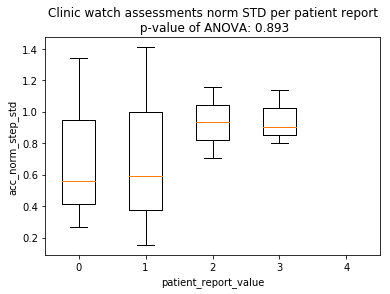

In [15]:
df = clinic_watch_acc_assess_means

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['clinician_report_value'] == x]) for x in df['clinician_report_value'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2])
box_plot.create_box_plot(df, 'clinician_report_value', 'acc_norm_step_std',
                         all_possible_x_vals=c.report_values,
                         plt_title='Clinic watch assessments norm STD per clinician report\n p-value of ANOVA: %.3f' % (p))

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['patient_report_value'] == x]) for x in df['patient_report_value'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2], boxes_vals[3])
box_plot.create_box_plot(df, 'patient_report_value', 'acc_norm_step_std',
                         all_possible_x_vals=c.report_values,
                         plt_title='Clinic watch assessments norm STD per patient report\n p-value of ANOVA: %.3f' % (p))

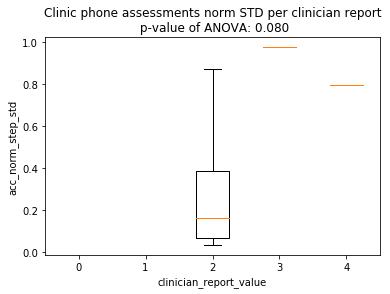

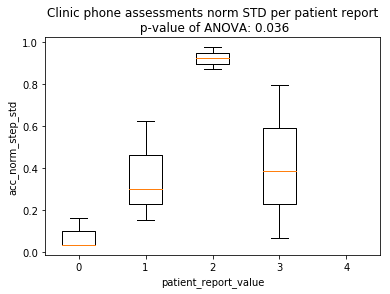

In [16]:
df = clinic_phone_acc_assess_means

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['clinician_report_value'] == x]) for x in df['clinician_report_value'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2])
box_plot.create_box_plot(df, 'clinician_report_value', 'acc_norm_step_std',
                         all_possible_x_vals=c.report_values,
                         plt_title='Clinic phone assessments norm STD per clinician report\n p-value of ANOVA: %.3f' % (p))

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['patient_report_value'] == x]) for x in df['patient_report_value'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2], boxes_vals[3])
box_plot.create_box_plot(df, 'patient_report_value', 'acc_norm_step_std',
                         all_possible_x_vals=c.report_values,
                         plt_title='Clinic phone assessments norm STD per patient report\n p-value of ANOVA: %.3f' % (p))

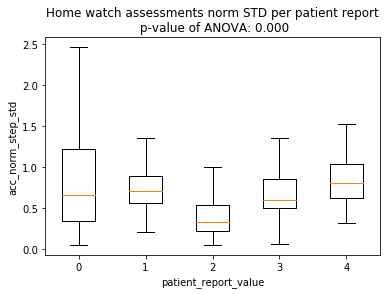

In [18]:
df = home_watch_acc_assess_means

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['patient_report_value'] == x]) for x in df['patient_report_value'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2], boxes_vals[3], boxes_vals[4])
box_plot.create_box_plot(df, 'patient_report_value', 'acc_norm_step_std',
                         with_outliers=False, all_possible_x_vals=c.report_values,
                         plt_title='Home watch assessments norm STD per patient report\n p-value of ANOVA: %.3f' % (p))

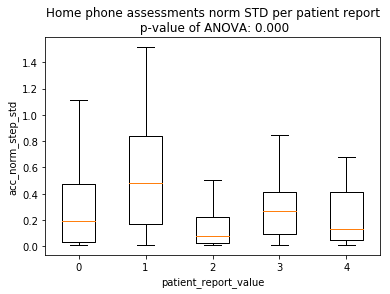

In [19]:
df = home_phone_acc_assess_means

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['patient_report_value'] == x]) for x in df['patient_report_value'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2], boxes_vals[3], boxes_vals[4])
box_plot.create_box_plot(df, 'patient_report_value', 'acc_norm_step_std',
                         with_outliers=False, all_possible_x_vals=c.report_values,
                         plt_title='Home phone assessments norm STD per patient report\n p-value of ANOVA: %.3f' % (p))

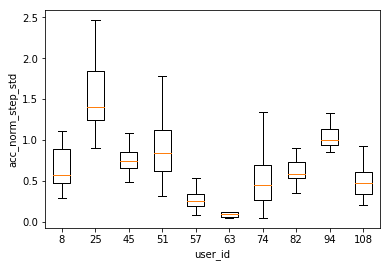

In [20]:
df = home_watch_acc_assess_means

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['user_id'] == x]) for x in df['user_id'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2], boxes_vals[3], boxes_vals[4], boxes_vals[5], boxes_vals[6],
                      boxes_vals[7], boxes_vals[8], boxes_vals[9],)
box_plot.create_box_plot(df, x_discrete_variable='user_id', y_cont_variable='acc_norm_step_std',
                         with_outliers=False, all_possible_x_vals=None)
#                          plt_title='Clinic watch assessments activity level per patient')

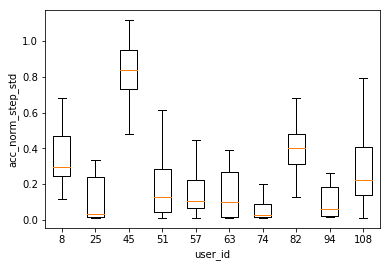

In [21]:
df = home_phone_acc_assess_means

boxes_vals = [np.asarray(df['acc_norm_step_std']\
              [df['user_id'] == x]) for x in df['user_id'].unique()]
f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2], boxes_vals[3], boxes_vals[4], boxes_vals[5], boxes_vals[6],
                      boxes_vals[7], boxes_vals[8], boxes_vals[9],)
box_plot.create_box_plot(df, x_discrete_variable='user_id', y_cont_variable='acc_norm_step_std',
                         with_outliers=False, all_possible_x_vals=None)
#                          plt_title='Clinic watch assessments activity level per patient')

# Raw accelerometer data analysis:

## Clinic Raw Data Exploration:

In [20]:
def plot_assessment_with_steps(enriched_df, steps_means_df, assess_means_df, sensor, clinic=True):
    ylim = 20
    y_label_delta = 0.5
    sorted_df = enriched_df.sort_values(by='timestamp', ascending=True)
    assessments = sorted_df['assessment_id'].unique()
    for assess in assessments:
        assess_df = sorted_df[sorted_df['assessment_id']==assess].copy()
        patient = assess_df['user_id'].unique()[0]
        if patient==82:
            assess_df = assess_df[assess_df['step_name']!='TUaG']
        assess_df.reset_index(inplace=True)
        
        assessment = assess_df['assessment_id'].unique()[0]
        print('\n\nuser: %s, assessment: %s' % (patient, assessment))
        patient_report = assess_df['patient_report_value'].unique()[0]
        if clinic:
            clinician_report = assess_df['clinician_report_value'].unique()[0]
            print('patient report: %.0f, clinician report: %.0f' % (patient_report, clinician_report))
        else:
            print('patient report: %.0f' % (patient_report))
        
        steps_means_assess = steps_means_df[steps_means_df['assessment_id']==assess]
        for indx, row in steps_means_assess.iterrows():
            print('Norm STD for step %s: %.2f' %(row['step_name'], row['acc_norm_step_std']))
        assess_mean = assess_means_df['acc_norm_step_std'][assess_means_df['assessment_id']==assess]
        print('Static steps norm STD: %.2f' % (assess_mean))
        
        steps_indxs = dict()

        first_indx_df = assess_df[['assessment_id', 'step_name']].drop_duplicates(keep='first')
        last_indx_df = assess_df[['assessment_id', 'step_name']].drop_duplicates(keep='last')
        for index, row in first_indx_df.iterrows():
            step = row['step_name']
            first_index = index
            last_index = last_indx_df[last_indx_df['step_name']==step].index
            if step not in steps_indxs:
                steps_indxs[step] = (first_index, last_index[0])

        signal = assess_df[['x', 'y', 'z']]
        signal = np.asarray(signal)
        plt.figure(figsize=(20,5))
        plt.plot(signal)
        plt.ylim(-ylim, ylim)
        plt.xticks(range(0, signal.shape[0], 500), range(0, int(signal.shape[0]/50), 10))
        for step in steps_indxs:
            step_start = int(steps_indxs[step][0])
            step_end = int(steps_indxs[step][1])
#             step_len = int(step_end-step_start)
#             text_len = len(step)
#             label = "|"+"-"*int((step_len-text_len)/2)+step+"-"*int((step_len-text_len)/2)+"|"
            plt.text(step_start, ylim+y_label_delta, '|', fontsize=25)
#             plt.text(step_start+100, ylim+y_label_delta, step, fontsize=9)
        plt.show()
        plt.close()



user: 57, assessment: 1481923232988
patient report: 1, clinician report: 2
Norm STD for step Sit extended: 0.22
Norm STD for step Sit relaxed: 0.13
Norm STD for step Stand: 0.12
Static steps norm STD: 0.15


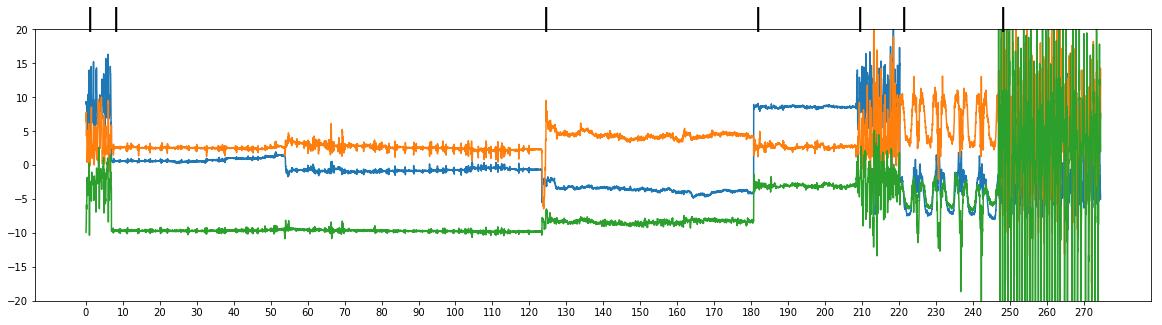



user: 74, assessment: 1485546321147
patient report: 2, clinician report: 2
Norm STD for step Sit extended: 0.45
Norm STD for step Sit relaxed: 1.06
Norm STD for step Stand: 0.62
Static steps norm STD: 0.71


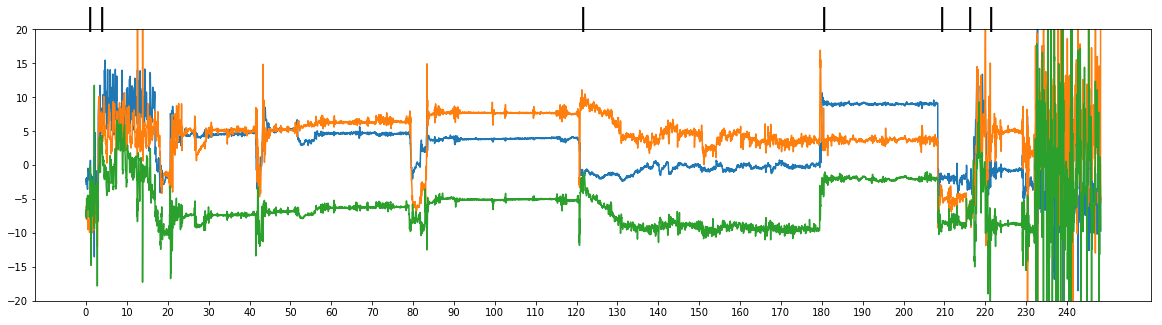



user: 25, assessment: 1487605701264
patient report: 1, clinician report: 2
Norm STD for step Sit extended: 0.55
Norm STD for step Sit relaxed: 1.47
Norm STD for step Stand: 2.20
Static steps norm STD: 1.41


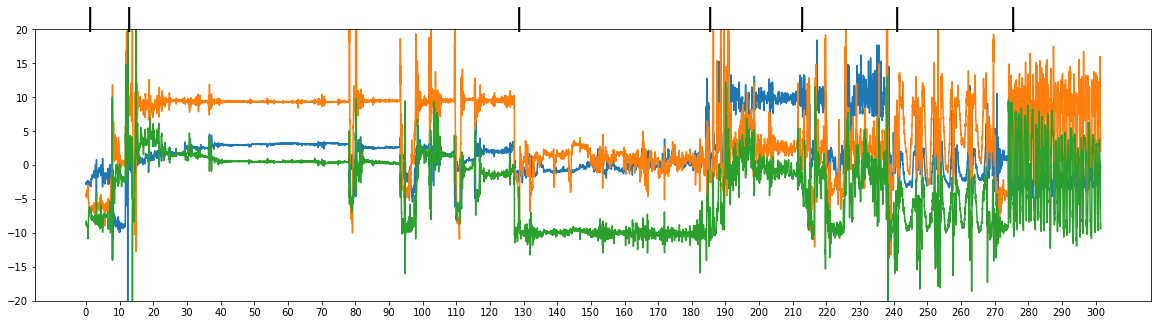



user: 108, assessment: 1488396181636
patient report: 0, clinician report: 2
Norm STD for step Sit extended: 0.61
Norm STD for step Sit relaxed: 0.41
Norm STD for step Stand: 0.66
Static steps norm STD: 0.56


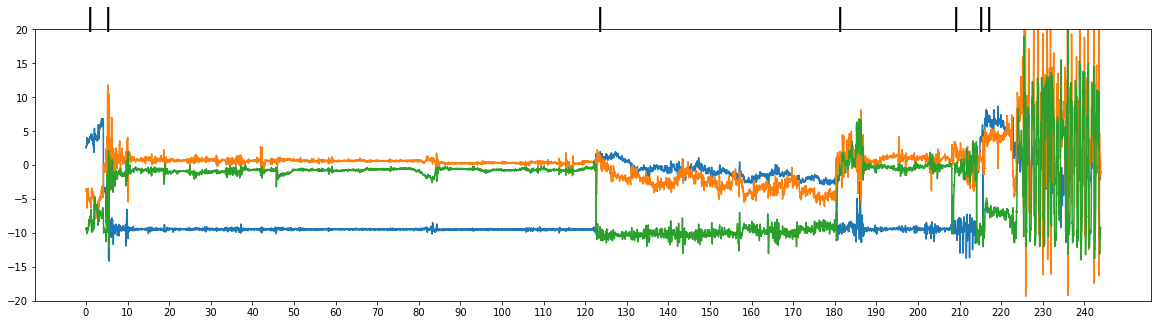



user: 82, assessment: 1489765988342
patient report: 3, clinician report: 4
Norm STD for step Sit extended: 1.15
Norm STD for step Sit relaxed: 0.37
Norm STD for step Stand: 1.90
Static steps norm STD: 1.14


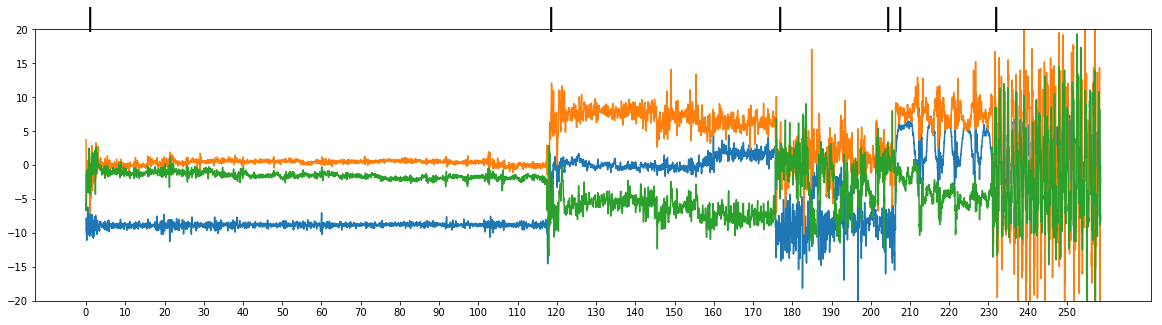



user: 51, assessment: 1490284781631
patient report: 3, clinician report: 2
Norm STD for step Sit extended: 1.46
Norm STD for step Sit relaxed: 0.51
Norm STD for step Stand: 0.74
Static steps norm STD: 0.91


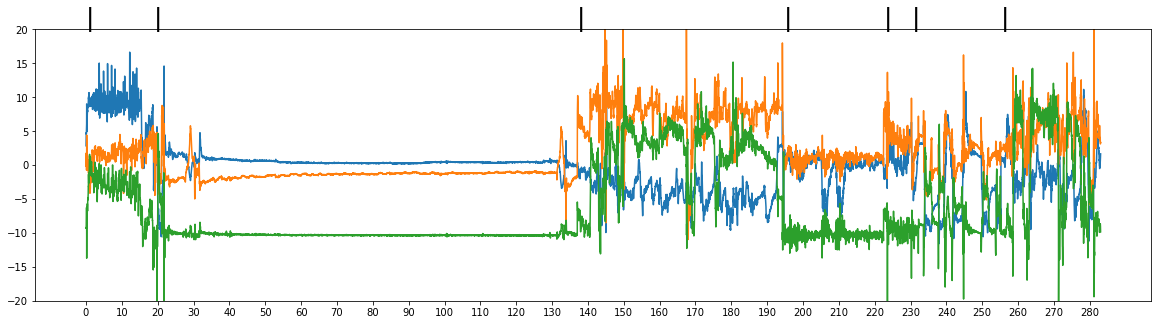



user: 45, assessment: 1490637319938
patient report: 2, clinician report: 3
Norm STD for step Sit extended: 0.94
Norm STD for step Sit relaxed: 1.42
Norm STD for step Stand: 1.12
Static steps norm STD: 1.16


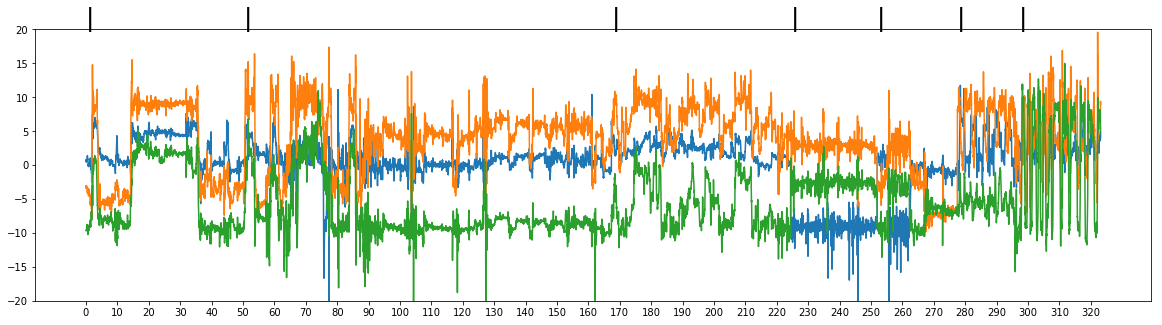



user: 8, assessment: 1490640580656
patient report: 1, clinician report: 2
Norm STD for step Sit extended: 0.28
Norm STD for step Sit relaxed: 0.11
Norm STD for step Stand: 1.39
Static steps norm STD: 0.59


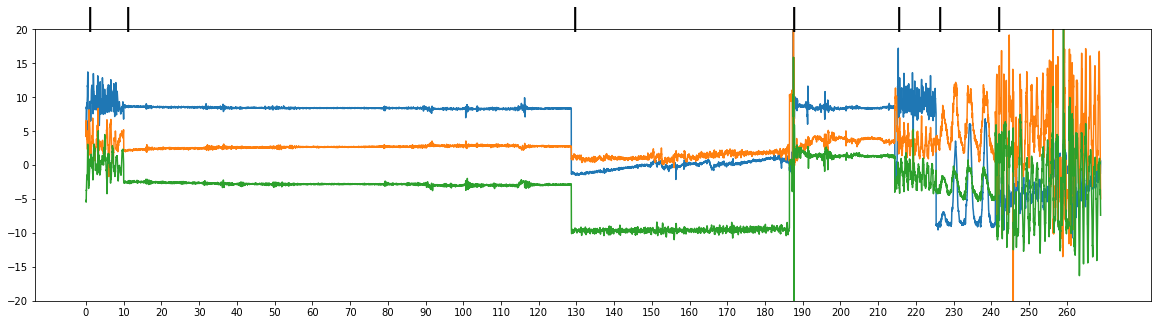



user: 94, assessment: 1493741957038
patient report: 3, clinician report: 2
Norm STD for step Sit extended: 0.75
Norm STD for step Sit relaxed: 0.71
Norm STD for step Stand: 0.95
Static steps norm STD: 0.80


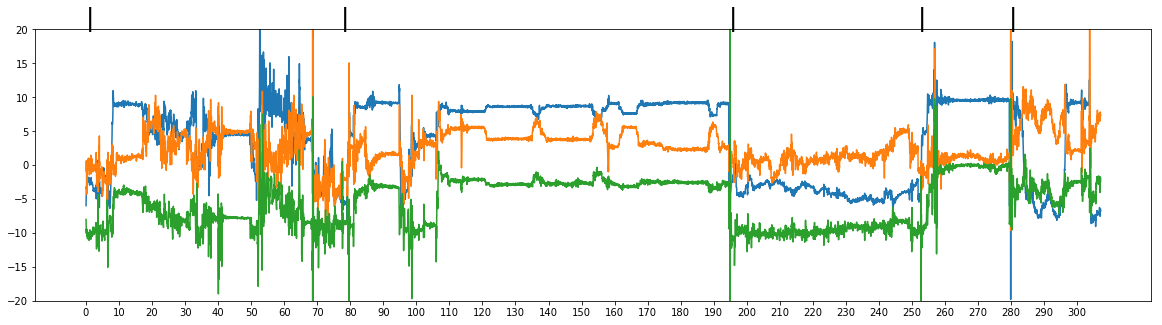



user: 25, assessment: 1493912424448
patient report: 0, clinician report: 2
Norm STD for step Sit extended: 0.87
Norm STD for step Sit relaxed: 1.38
Norm STD for step Stand: 1.76
Static steps norm STD: 1.34


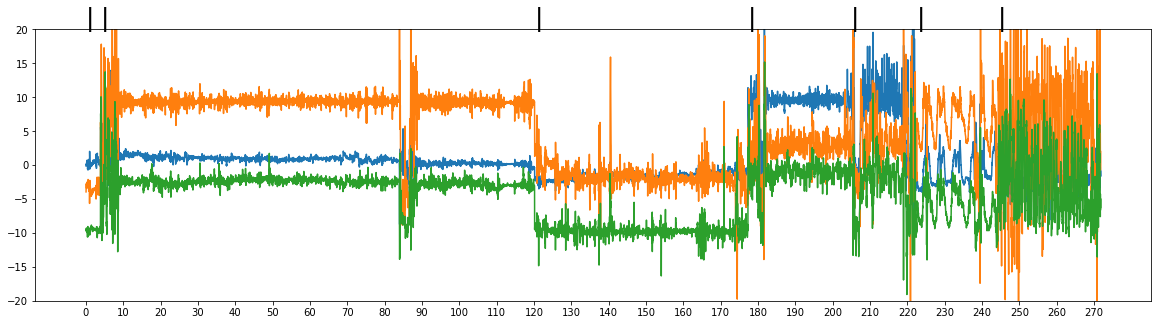



user: 63, assessment: 1493920652116
patient report: 0, clinician report: 2
Norm STD for step Sit extended: 0.20
Norm STD for step Sit relaxed: 0.09
Norm STD for step Stand: 0.51
Static steps norm STD: 0.27


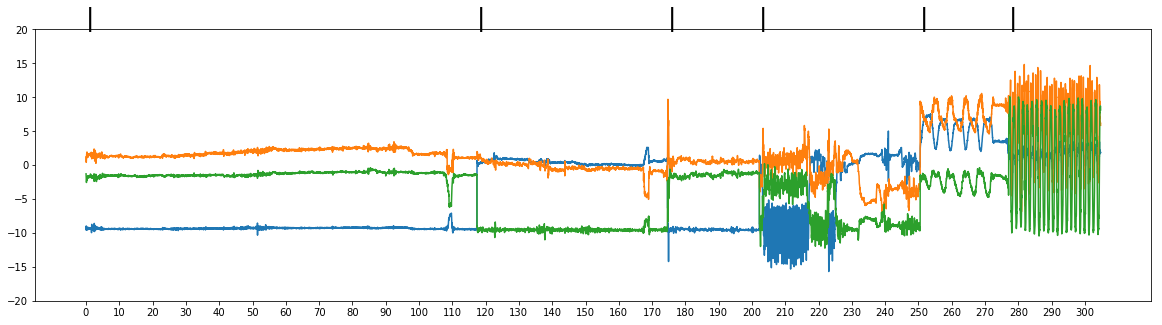

In [21]:
plot_assessment_with_steps(clinic_watch_acc_with_deltas, clinic_watch_acc_step_means, clinic_watch_acc_assess_means, 'watch')



user: 57, assessment: 1481923232988
patient report: 1, clinician report: 2
Norm STD for step Sit extended: 0.03
Norm STD for step Sit relaxed: 0.40
Norm STD for step Stand: 0.03
Static steps norm STD: 0.16


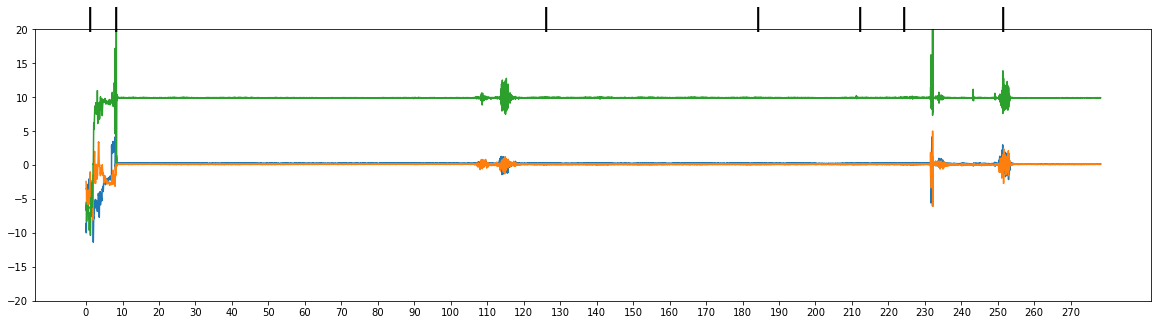



user: 74, assessment: 1485546321147
patient report: 2, clinician report: 2
Norm STD for step Sit extended: 0.74
Norm STD for step Sit relaxed: 0.93
Norm STD for step Stand: 0.94
Static steps norm STD: 0.87


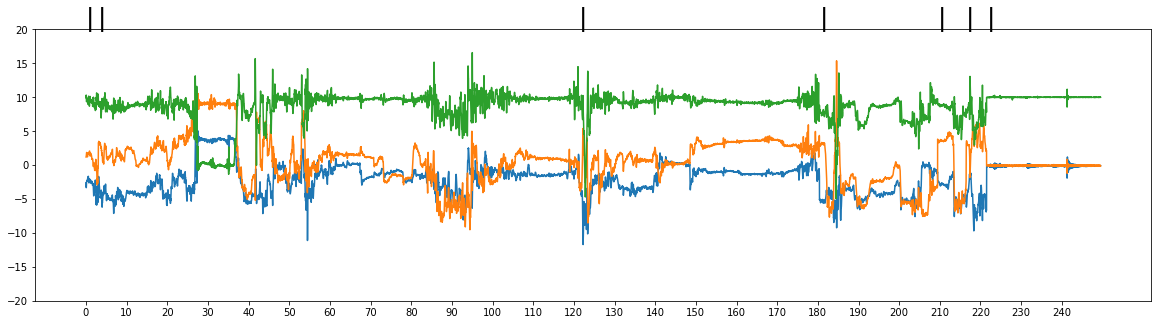



user: 25, assessment: 1487605701264
patient report: 1, clinician report: 2
Norm STD for step Sit extended: 0.07
Norm STD for step Sit relaxed: 0.14
Norm STD for step Stand: 0.70
Static steps norm STD: 0.30


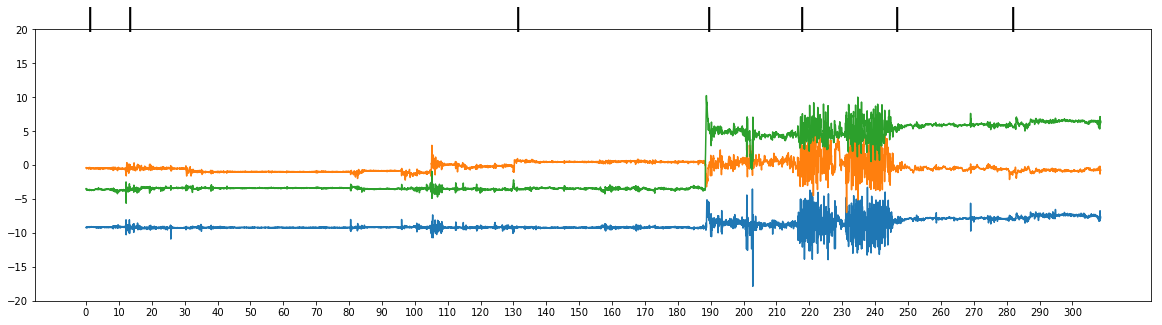



user: 108, assessment: 1488396181636
patient report: 0, clinician report: 2
Norm STD for step Sit extended: 0.08
Norm STD for step Sit relaxed: 0.11
Norm STD for step Stand: 0.30
Static steps norm STD: 0.16


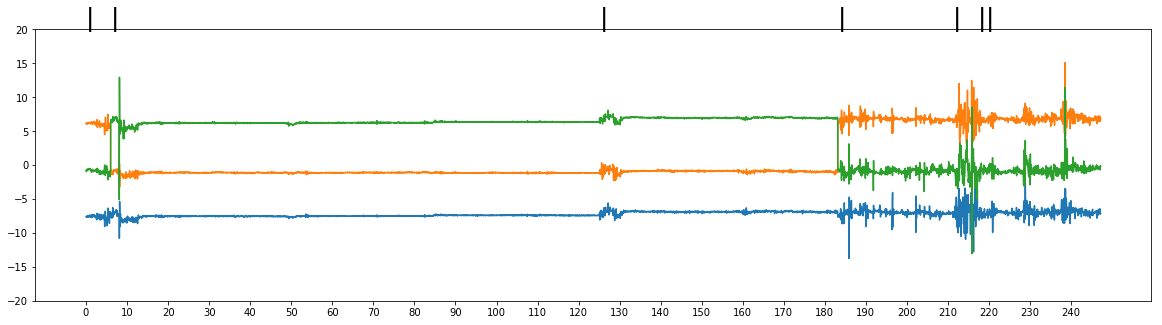



user: 82, assessment: 1489765988342
patient report: 3, clinician report: 4
Norm STD for step Sit extended: 0.26
Norm STD for step Sit relaxed: 0.10
Norm STD for step Stand: 2.03
Static steps norm STD: 0.80


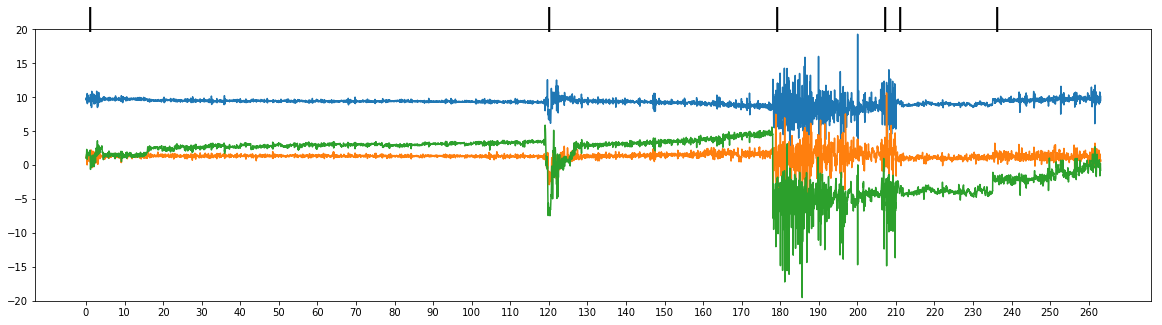



user: 51, assessment: 1490284781631
patient report: 3, clinician report: 2
Norm STD for step Sit extended: 0.27
Norm STD for step Sit relaxed: 0.11
Norm STD for step Stand: 0.79
Static steps norm STD: 0.39


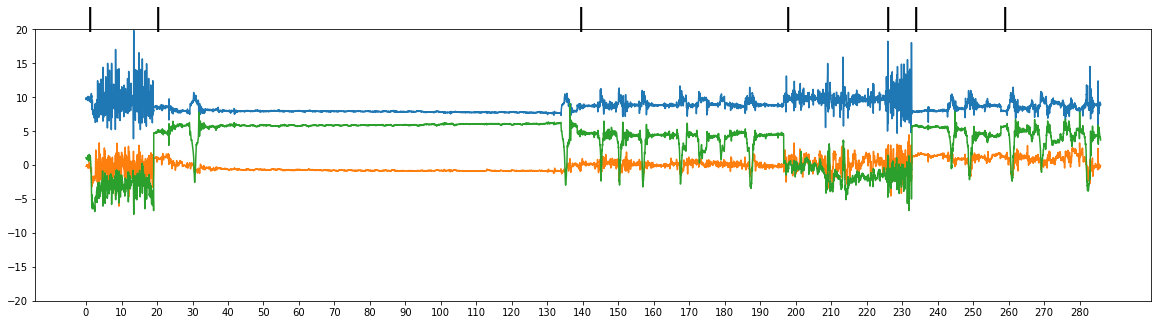



user: 45, assessment: 1490637319938
patient report: 2, clinician report: 3
Norm STD for step Sit extended: 0.25
Norm STD for step Sit relaxed: 1.75
Norm STD for step Stand: 0.93
Static steps norm STD: 0.97


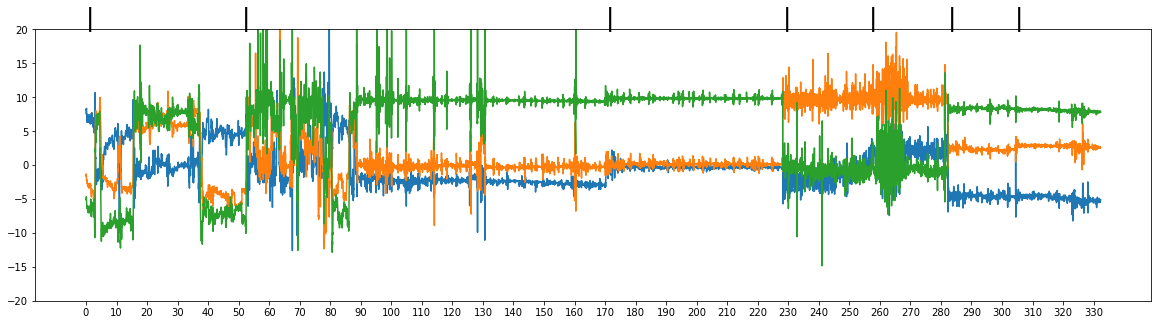



user: 8, assessment: 1490640580656
patient report: 1, clinician report: 2
Norm STD for step Sit extended: 0.22
Norm STD for step Sit relaxed: 0.27
Norm STD for step Stand: 1.37
Static steps norm STD: 0.62


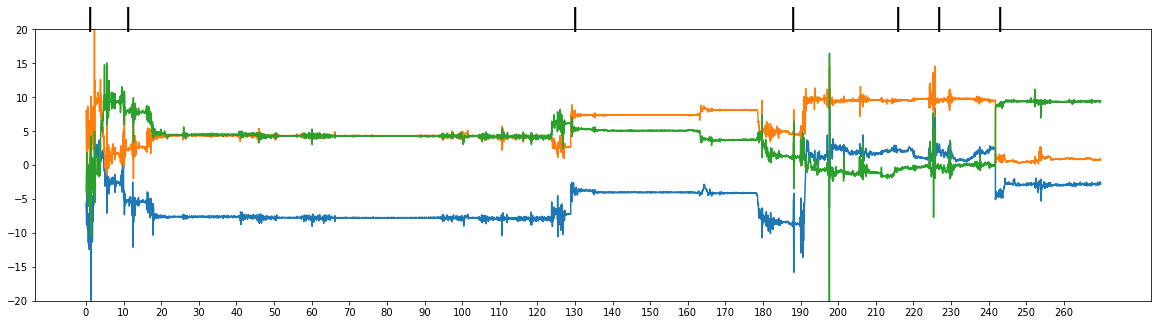



user: 94, assessment: 1493741957038
patient report: 3, clinician report: 2
Norm STD for step Sit extended: 0.03
Norm STD for step Sit relaxed: 0.05
Norm STD for step Stand: 0.13
Static steps norm STD: 0.07


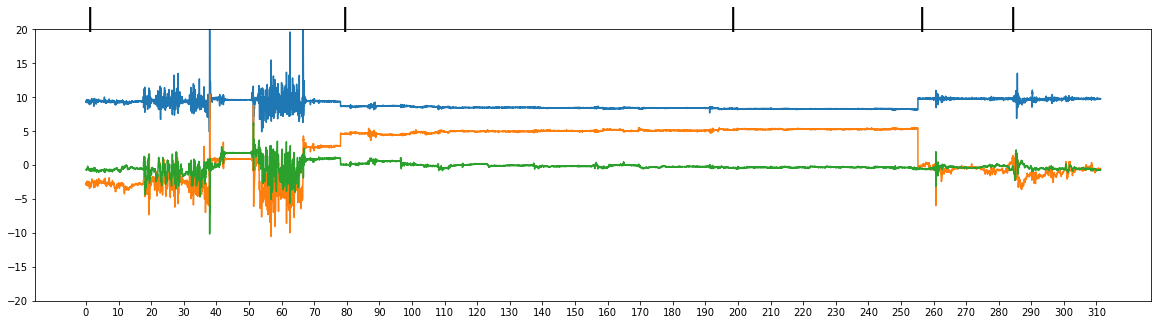



user: 25, assessment: 1493912424448
patient report: 0, clinician report: 2
Norm STD for step Sit extended: 0.03
Norm STD for step Sit relaxed: 0.05
Norm STD for step Stand: 0.03
Static steps norm STD: 0.04


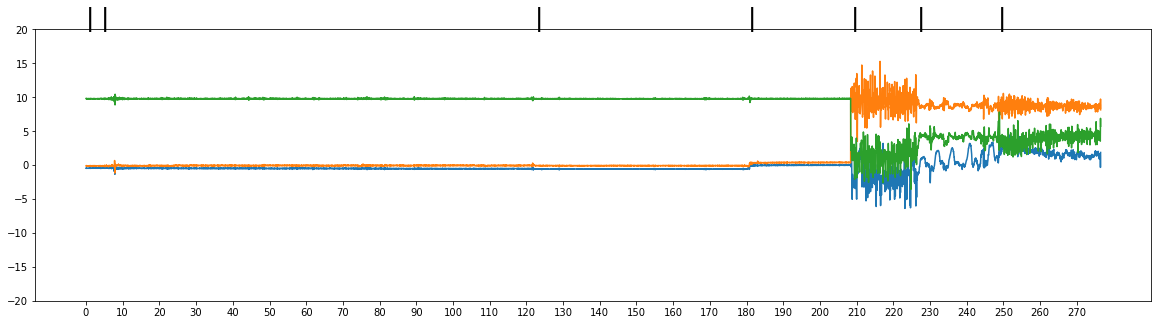



user: 63, assessment: 1493920652116
patient report: 0, clinician report: 2
Norm STD for step Sit extended: 0.02
Norm STD for step Sit relaxed: 0.03
Norm STD for step Stand: 0.06
Static steps norm STD: 0.04


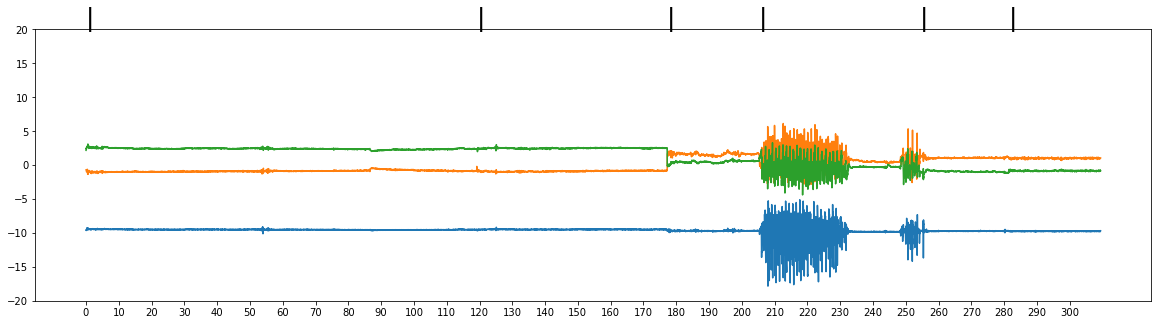

In [16]:
plot_assessment_with_steps(clinic_phone_acc_with_deltas, clinic_phone_acc_step_means, clinic_phone_acc_assess_means, 'phone')

## Home Raw Data Exploration:

In [56]:
all_home_assessments = home_watch_acc_with_deltas['assessment_id'].unique()
random_assessments = np.random.choice(all_home_assessments, 10, replace = False)



user: 57, assessment: 1487729046375
patient report: 2
Norm's mean delta from baseline: 29.16


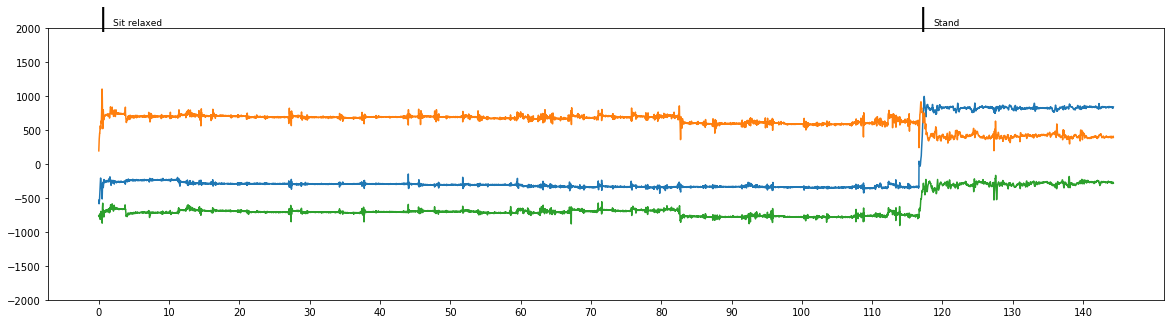



user: 25, assessment: 1488236696945
patient report: 0
Norm's mean delta from baseline: 69.63


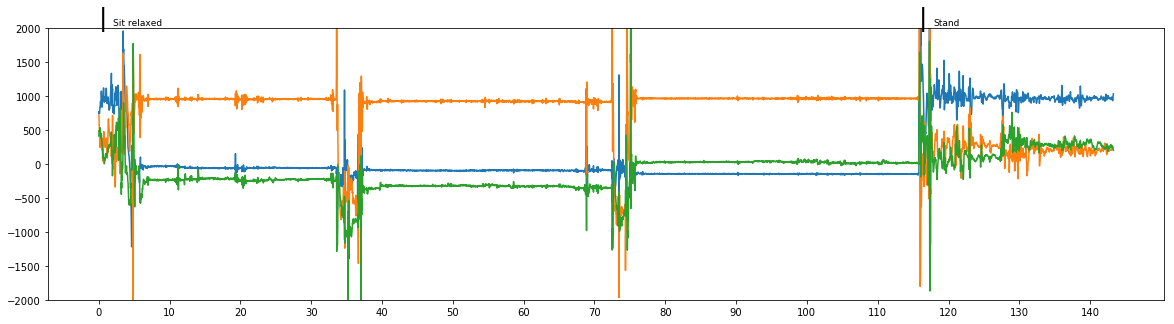



user: 108, assessment: 1488395389306
patient report: 0
Norm's mean delta from baseline: 21.42


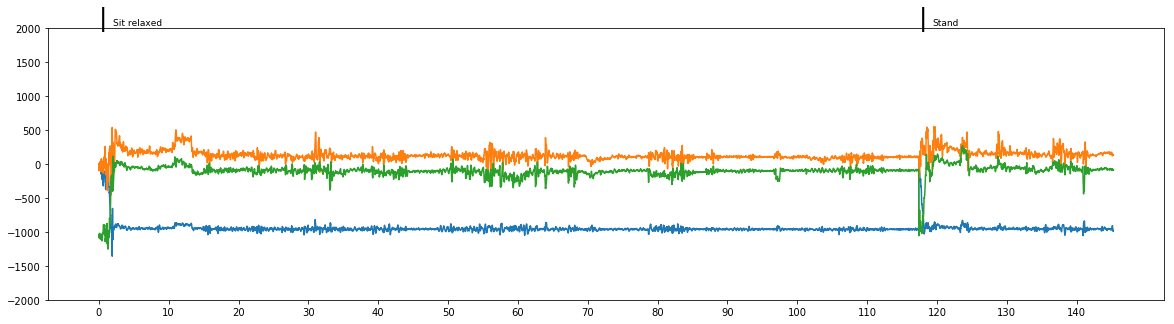



user: 74, assessment: 1489417390556
patient report: 2
Norm's mean delta from baseline: 21.68


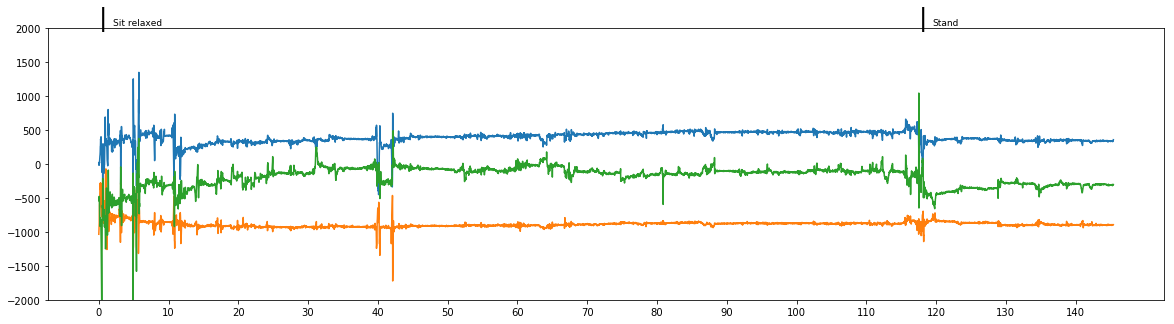



user: 57, assessment: 1490148227403
patient report: 2
Norm's mean delta from baseline: 21.49


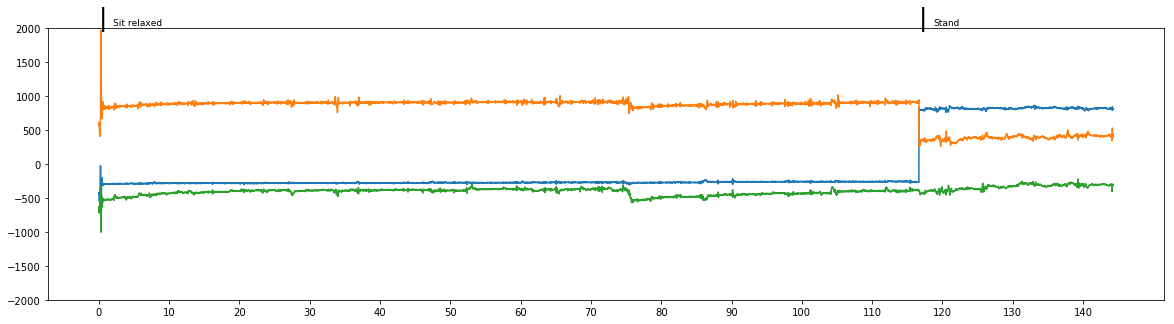



user: 74, assessment: 1493301813273
patient report: 2
Norm's mean delta from baseline: 20.00


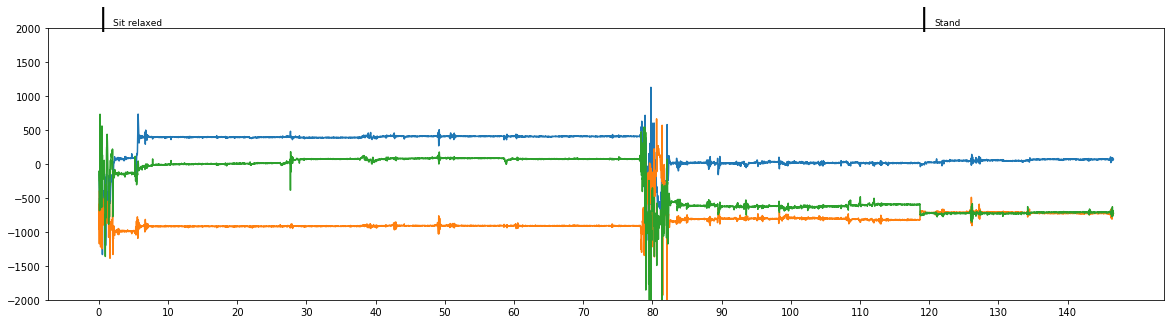



user: 25, assessment: 1493304777885
patient report: 0
Norm's mean delta from baseline: 31.83


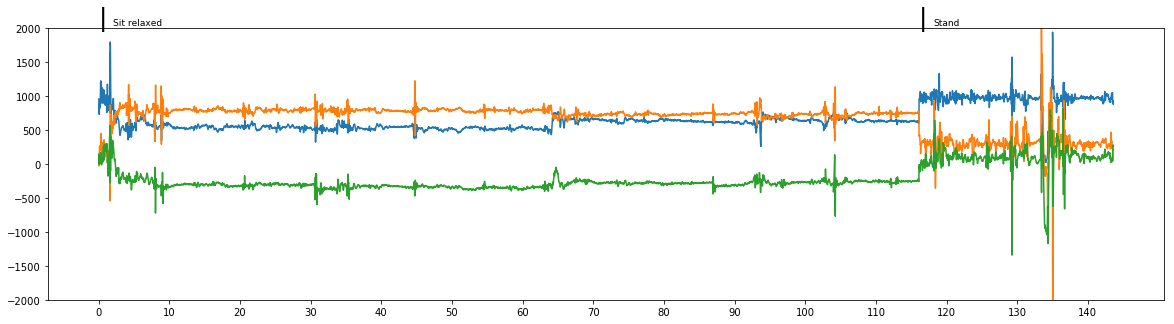



user: 45, assessment: 1494954221705
patient report: 1
Norm's mean delta from baseline: 40.37


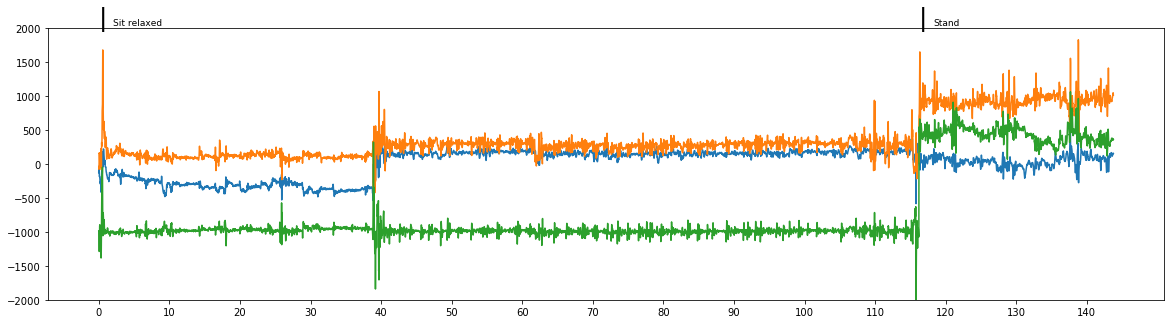



user: 74, assessment: 1495638581360
patient report: 2
Norm's mean delta from baseline: 8.08


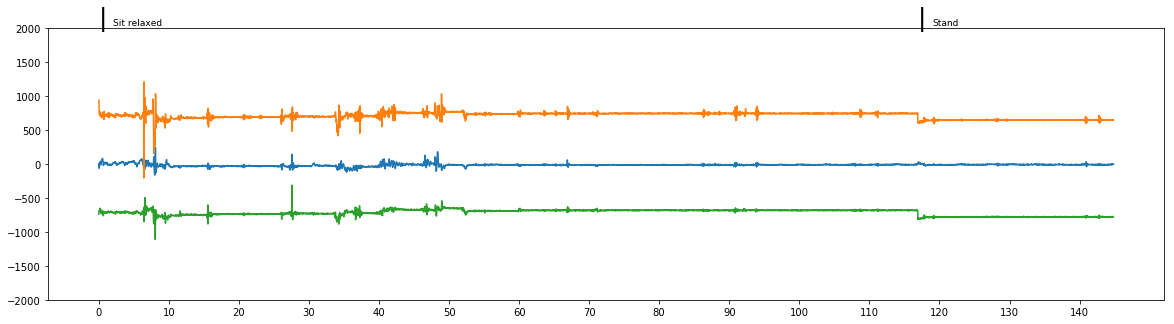



user: 51, assessment: 1496362977841
patient report: 4
Norm's mean delta from baseline: 48.98


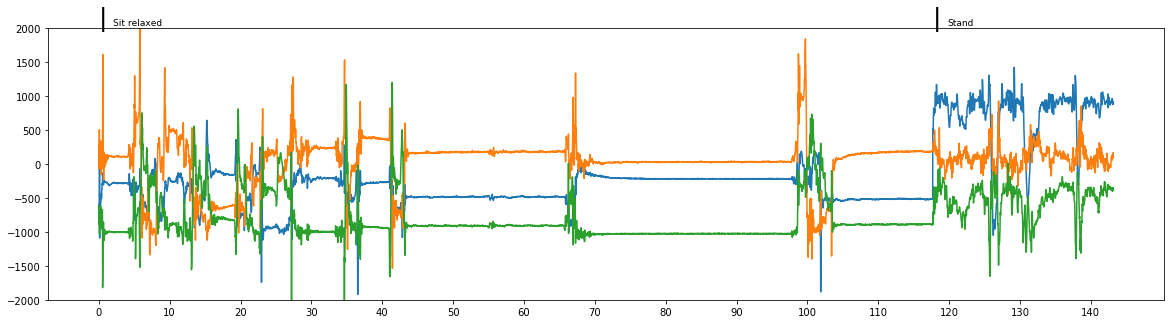

In [65]:
random_watch = home_watch_acc_with_deltas[home_watch_acc_with_deltas['assessment_id'].isin(random_assessments)]
plot_assessment_with_steps(random_watch, 'watch', clinic=False)



user: 57, assessment: 1487729046375
patient report: 2
Norm's mean delta from baseline: 0.13


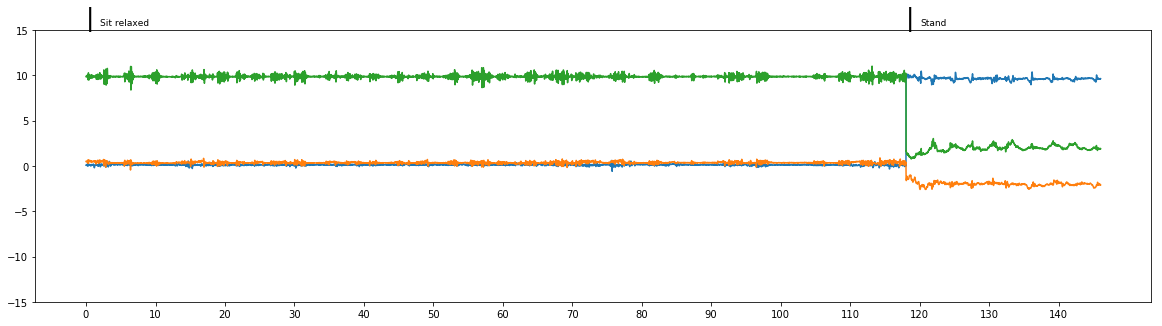



user: 108, assessment: 1488395389306
patient report: 0
Norm's mean delta from baseline: 0.08


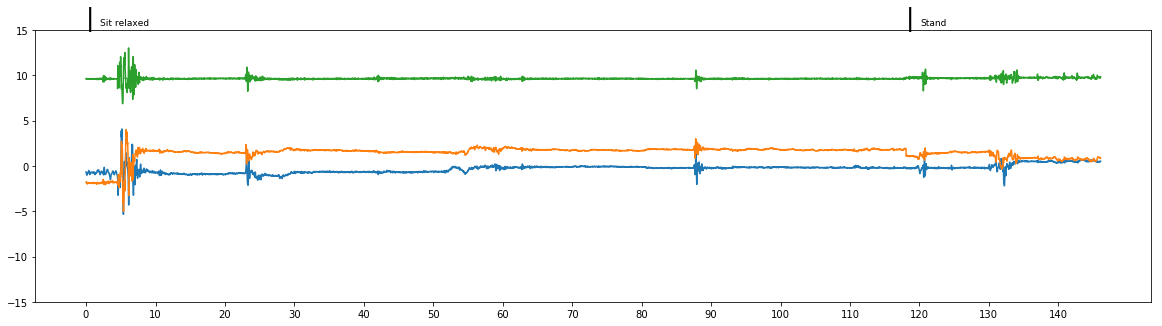



user: 74, assessment: 1489417390556
patient report: 2
Norm's mean delta from baseline: 0.01


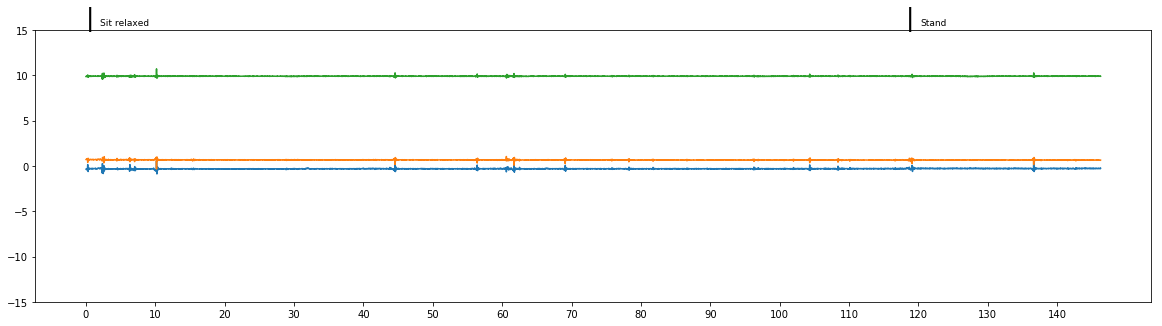



user: 57, assessment: 1490148227403
patient report: 2
Norm's mean delta from baseline: 0.07


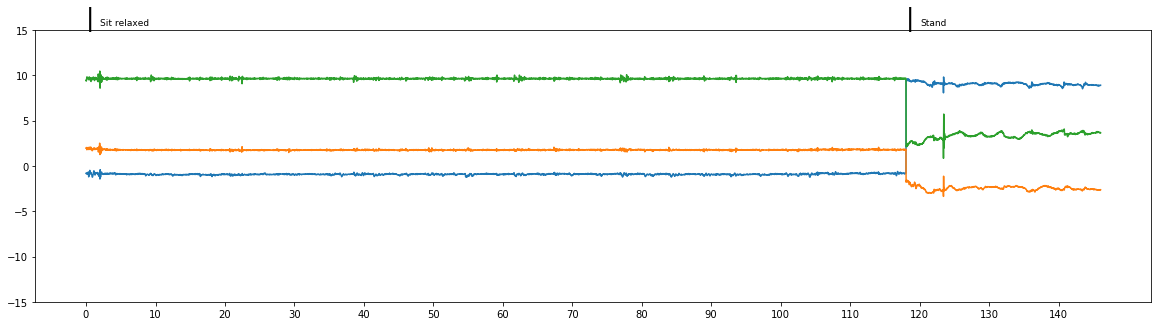



user: 74, assessment: 1493301813273
patient report: 2
Norm's mean delta from baseline: 0.02


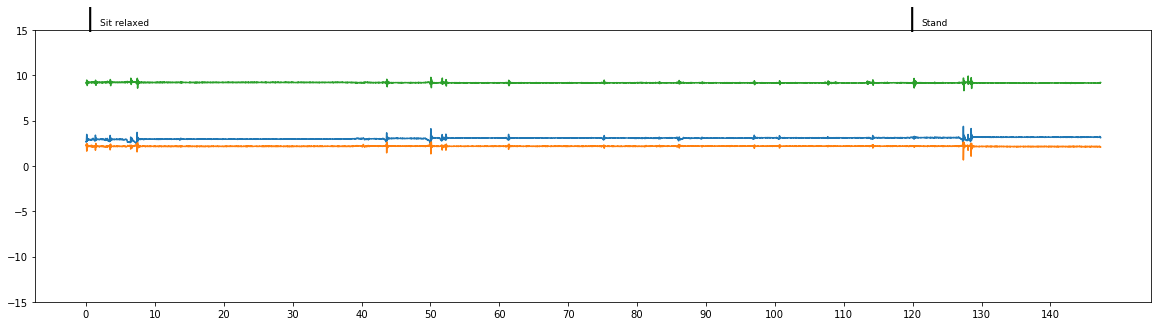



user: 45, assessment: 1494954221705
patient report: 1
Norm's mean delta from baseline: 0.31


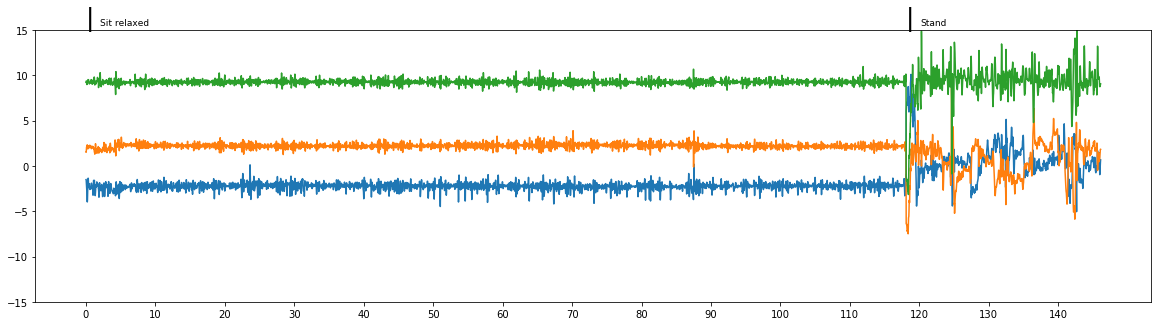



user: 74, assessment: 1495638581360
patient report: 2
Norm's mean delta from baseline: 0.03


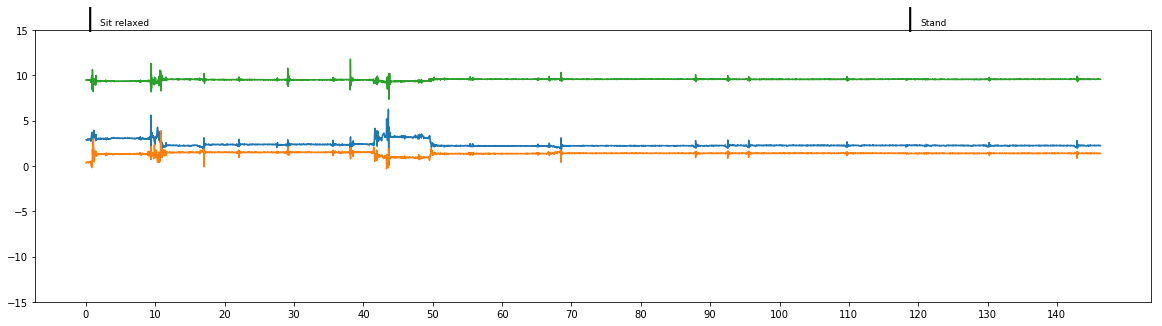



user: 51, assessment: 1496362977841
patient report: 4
Norm's mean delta from baseline: 0.02


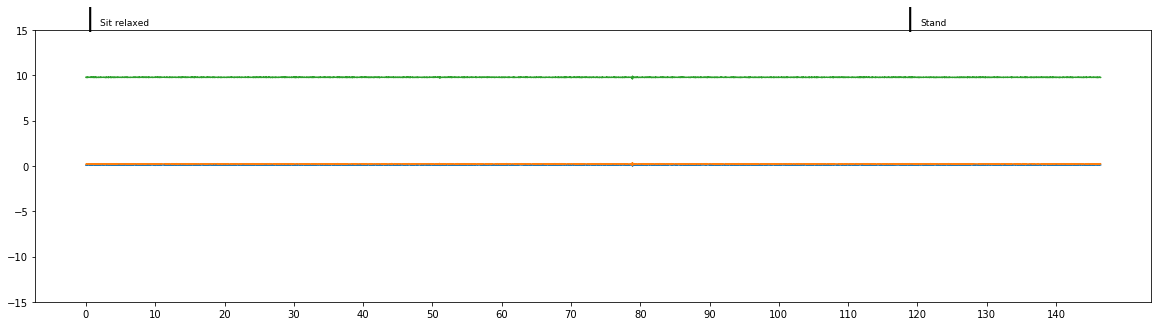

In [67]:
random_phone = home_phone_acc_with_deltas[home_phone_acc_with_deltas['assessment_id'].isin(random_assessments)]
plot_assessment_with_steps(random_phone, 'phone', clinic=False)

## Drill-downs:

step: Sit relaxed


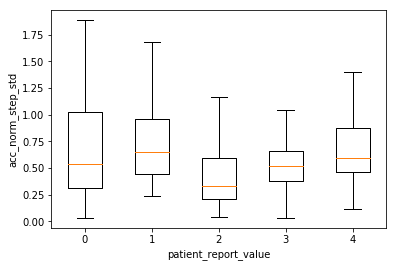

step: Stand


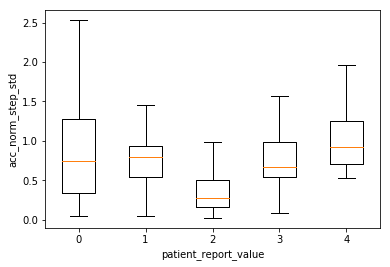

In [47]:
df = home_watch_acc_with_deltas
report = 'patient_report_value'
# for p in df['user_id'].unique():
for s in df['step_name'].unique():
#         print('patient:', p)
        print('step:', s)
        clinic_watch_acc_assess_means
        df_per_step = df[['user_id', 'assessment_id', 'step_name', report, 'acc_norm_step_std']]\
                      [(df['step_name']==s)]\
                      .groupby(['user_id', 'assessment_id', 'step_name'], as_index=False).agg('mean')
        df_per_assess = df_per_step[['user_id', 'assessment_id', report, 'acc_norm_step_std']]\
                        .groupby(['user_id', 'assessment_id'], as_index=False).agg('mean')
        unique_reports = df_per_assess[report].unique()
        boxes_vals = [np.asarray(df_per_assess['acc_norm_step_std']\
                      [df_per_assess[report] == x]) for x in unique_reports]
    #     f, p = stats.f_oneway(boxes_vals[0], boxes_vals[1], boxes_vals[2], boxes_vals[3], boxes_vals[4], boxes_vals[5], boxes_vals[6],
    #                           boxes_vals[7], boxes_vals[8], boxes_vals[9],)
        box_plot.create_box_plot(df_per_assess, x_discrete_variable=report, y_cont_variable='acc_norm_step_std',
                                 with_outliers=False, all_possible_x_vals=c.report_values)
    #                              plt_title='Home watch assessments activity level per patient')

In [44]:
home_watch_acc_assess_means[home_watch_acc_assess_means.user_id==82]

,user_id,assessment_id,patient_report_value,acc_norm_step_std
421,82,1489838927636,2.0,0.508022
422,82,1489842278301,1.0,0.480273
423,82,1490049388614,1.0,0.555474
424,82,1490190979929,2.0,0.740188
425,82,1490393107194,3.0,0.503959
426,82,1490396906044,2.0,0.574230
427,82,1490566942606,3.0,0.687848
428,82,1490916316372,3.0,0.468079
429,82,1491055639334,3.0,0.356368
430,82,1491433838697,3.0,0.365531
